In [1]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('./data/totalwithmaininfo-re-remove27-35.csv',sep=',')
df = df.drop(['respondent','Time'],axis=1)

In [3]:
df

,EAR,MAR,Circularity,MOE,Y,EAR_N,MAR_N,Circularity_N,MOE_N
0,0.257930,0.349535,0.417689,1.355153,0,-0.264316,-0.374278,0.849206,-0.896940
1,0.274627,0.373514,0.366795,1.360079,0,1.105607,1.133150,-1.102199,-0.181311
2,0.250898,0.343417,0.402140,1.368750,0,-0.841291,-0.758872,0.252993,1.078251
3,0.300371,0.350838,0.415034,1.168016,0,3.217887,-0.292358,0.747404,-28.080064
4,0.293565,0.320649,0.448924,1.092257,0,2.659484,-2.190191,2.046805,-39.084731
...,...,...,...,...,...,...,...,...,...
16555,0.348480,0.475887,0.490477,1.365606,0,0.219129,3.819414,0.011833,3.904620
16556,0.262352,0.470458,0.395392,1.793234,0,-3.791320,3.531398,-2.815814,12.722770
16557,0.319431,0.578497,0.490811,1.811024,0,-1.133518,9.262957,0.021755,13.089620
16558,0.256146,0.540343,0.378786,2.109511,0,-4.080274,7.238872,-3.309649,19.244768


In [4]:
train_percentage = 19/23
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [5]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [6]:
X_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]

In [7]:
X_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [8]:
def average(y_pred):
    for i in range(len(y_pred)):
        if i % 240 == 0 or (i+1) % 240 == 0:
            pass
        else: 
            average = float(y_pred[i-1] +  y_pred[i] + y_pred[i+1])/3
            if average >= 0.5:
                y_pred[i] = 1
            else:
                y_pred[i] = 0
    return y_pred

**LOGISTIC REGRESSION**

In [19]:
#LOGISTIC REGRESSION
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print(clf)
y_pred_1 = clf.predict(X_test)
y_pred_1 = average(y_pred_1)
y_score_1 = clf.predict_proba(X_test)[:,1]
acc1 = accuracy_score(y_test, y_pred_1)
f1_score_1 = metrics.f1_score(y_test, y_pred_1)
roc_1 = metrics.roc_auc_score(y_test, y_score_1)
print([acc1,f1_score_1,roc_1])

LogisticRegression(max_iter=1000)
[0.8902777777777777, 0.5123456790123457, 0.8942260515120963]


**DECISION TREE**

In [11]:
from sklearn.tree import DecisionTreeClassifier
acc5=[]
max_depth = []
for i in [2,3,4,5,6,7,8,9,10]:
    clf_DT = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf_DT.fit(X_train, y_train)
    pred_DT = clf_DT.predict(X_test)
    pred_DT = average(pred_DT)
    acc5.append(accuracy_score(pred_DT, y_test))
    max_depth.append(i)
print (max(acc5))

0.9309027777777777


In [12]:
best_depth = max_depth[acc5.index(max(acc5))]
print(best_depth)

2


In [17]:
clf_DT = DecisionTreeClassifier(random_state=0, max_depth = best_depth)
clf_DT.fit(X_train, y_train)
pred_DT = clf_DT.predict(X_test)
pred_DT = average(pred_DT)
y_score_5 = clf_DT.predict_proba(X_test)[:,1]
acc5 = accuracy_score(y_test, pred_DT)
f1_score_5 = metrics.f1_score(y_test, pred_DT)
roc_5 = metrics.roc_auc_score(y_test, y_score_5)
print([acc5,f1_score_5,roc_5])

[0.9309027777777777, 0.6195028680688337, 0.9302242668665184]


**RANDOM FOREST**

In [9]:
from sklearn.ensemble import RandomForestClassifier
acc6=[]
max_depth = []
for i in range(1,10):
    clf_RF = RandomForestClassifier(max_depth=i)
    clf_RF.fit(X_train, y_train) 
    pred_RF = clf_RF.predict(X_test)
    pred_RF = average(pred_RF)
    acc6.append(accuracy_score(pred_RF, y_test))
    max_depth.append(i)
print (max(acc6))
best_depth_6 = max_depth[acc6.index(max(acc6))]
print(best_depth_6)

0.9361111111111111
1


In [14]:
clf_RF = RandomForestClassifier(max_depth=best_depth_6)
clf_RF.fit(X_train, y_train) 
pred_RF = clf_RF.predict(X_test)
pred_RF = average(pred_RF)
y_score_6 = clf_RF.predict_proba(X_test)[:,1]
acc6 = accuracy_score(y_test, pred_RF)
f1_score_6 = metrics.f1_score(y_test, pred_RF)
roc_6 = metrics.roc_auc_score(y_test, y_score_6)
print([acc6,f1_score_6,roc_6])
print(confusion_matrix(y_test, pred_RF))

feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

[0.9336805555555555, 0.5441527446300716, 0.9677739377045468]
[[2575   19]
 [ 172  114]]


**KNN**

In [10]:
acc3_list = []
f1_score3_list = []
roc_3_list = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    pred_KN = neigh.predict(X_test)
    pred_KN = average(pred_KN)
    y_score_3 = neigh.predict_proba(X_test)[:,1]
    acc3_list.append(accuracy_score(y_test, pred_KN))
    f1_score3_list.append(metrics.f1_score(y_test, pred_KN))
    roc_3_list.append(metrics.roc_auc_score(y_test, y_score_3))

print(acc3_list.index(max(acc3_list))+1)    
neigh = KNeighborsClassifier(n_neighbors=acc3_list.index(max(acc3_list))+1)
neigh.fit(X_train, y_train) 
pred_KN = neigh.predict(X_test)
pred_KN = average(pred_KN)
y_score_3 = neigh.predict_proba(X_test)[:,1]
acc3 = accuracy_score(y_test, pred_KN)
f1_score_3 = metrics.f1_score(y_test, pred_KN)
roc_3 = metrics.roc_auc_score(y_test, y_score_3)
print([acc3])
print(confusion_matrix(y_test, pred_KN))

2
[0.7909722222222222]
[[2169  425]
 [ 177  109]]


**Naives Bayers**

In [13]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
pred_NB = clf_NB.predict(X_test)
pred_NB = average(pred_NB)
y_score_2 = clf_NB.predict_proba(X_test)[:,1]
acc2 = accuracy_score(y_test, pred_NB)
f1_score_2 = metrics.f1_score(y_test, pred_NB)
roc_2 = metrics.roc_auc_score(y_test, y_score_2)
print([acc2,f1_score_2])

[0.8503472222222223, 0.5096700796359499]


In [15]:
feature_importances

,importance
EAR,0.29
MOE,0.23
Circularity,0.22
MOE_N,0.13
EAR_N,0.06
Circularity_N,0.05
MAR_N,0.02
MAR,0.00


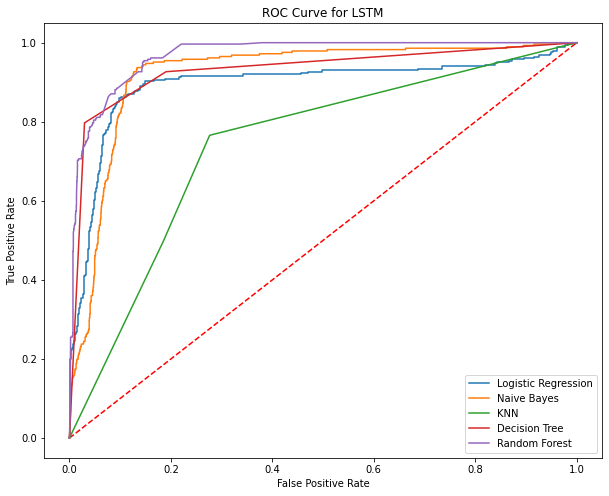

In [20]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1],'r--')
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_score_1)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_score_2)
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_score_3)
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_score_5)
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_score_6)
plt.plot(fpr_1, tpr_1, label= "Logistic Regression")
plt.plot(fpr_2, tpr_2, label= "Naive Bayes")
plt.plot(fpr_3, tpr_3, label= "KNN")
plt.plot(fpr_5, tpr_5, label= "Decision Tree")
plt.plot(fpr_6, tpr_6, label= "Random Forest")
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

,Accuracy
Model,
Logistic Regression,0.890278
Naive Bayes,0.850347
KNN,0.790972
Decision Tree,0.930903
Random Forest,0.933681


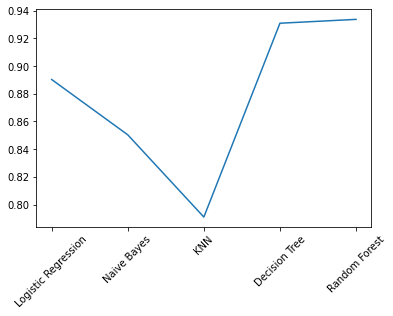

In [21]:
acc_total = {'Model':['Logistic Regression','Naive Bayes', 'KNN','Decision Tree','Random Forest'],
        'Accuracy':[acc1,acc2, acc3, acc5,acc6]}
acc_total=pd.DataFrame(acc_total)
acc_total=acc_total.set_index('Model')
acc_total
plt.plot(acc_total['Accuracy'])
plt.xticks(rotation=45)
acc_total